<a href="https://colab.research.google.com/github/superbunny38/Projects/blob/main/vaccinesideeffects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from urllib.parse import unquote, quote_plus, urlencode

# Get Data (COVID)

In [ ]:
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
serviceKey = 'UIZ4nR8Yx%2FM2qRLipwYmfJVi%2B6Fl8uCyx4gSk7S07xo1oOkiRf3hHp8xiiBljk2z6YDG5Kxrq3gCnA3jVWZJ4Q%3D%3D'
decodekey = 'UIZ4nR8Yx/M2qRLipwYmfJVi+6Fl8uCyx4gSk7S07xo1oOkiRf3hHp8xiiBljk2z6YDG5Kxrq3gCnA3jVWZJ4Q=='

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
from urllib import parse
startCreateDt = 2019414
endCreateDt = 20211213
params = {'ServiceKey':parse.unquote(serviceKey), # 서비스키(필수)
          'startCreateDt':startCreateDt, # 데이터 생성일 시작범위(선택)
          'endCreateDt':endCreateDt # 데이터 생성일 종료범위(선택)
}

res = requests.get(url, params=params)
soup = bs(res.text, 'lxml')
'''
query_params = '?' + urlencode({
    quote_plus('serviceKey'): decodekey,
    quote_plus('startCreateDt'): startCreateDt,
    quote_plus('endCreateDt'): endCreateDt
})

URL = url + query_params'''

"\nquery_params = '?' + urlencode({\n    quote_plus('serviceKey'): decodekey,\n    quote_plus('startCreateDt'): startCreateDt,\n    quote_plus('endCreateDt'): endCreateDt\n})\n\nURL = url + query_params"

In [ ]:
items = soup.find_all('item')
#print(items)

In [ ]:
# 리스트 원소 확인
for x in items:
    print(x)
    print()

In [ ]:
response = {'seq': '고유번호',
            'statedt': '기준일',
            'statetime': '기준시간',
            'decidecnt': '확진자',
            'clearcnt': '격리해제',
            'examcnt': '검사진행',
            'deathcnt': '사망자',
            'carecnt': '치료중',
            'resutlnegcnt': '음성',
            'accexamcnt': '누적검사',
            'accexamcompcnt': '누적검사완료',
            'accdefrate': '누적확진률',
            'createdt': '등록일시',
            'updatedt': '수정'}

In [ ]:
# xml을 dictionary로 바꿔 리스트 원소로 추가
lst = []
for y in items:
    l = {}
    for x in y:
        l[x.name] = x.text
    lst.append(l)
#lst

In [ ]:
# list를 dataframe으로 만들기
df = pd.DataFrame(lst)
df.columns = df.columns.map(response)
df

,누적검사,등록일시,사망자,확진자,고유번호,기준일,기준시간,수정,누적확진률
0,18140572,2021-12-13 09:00:10.891,4292,523077,726,20211213,00:00,2021-12-17 09:08:32.95,NaN
1,18084589,2021-12-12 08:35:19.089,4252,517260,725,20211212,00:00,2021-12-17 09:08:23.25,NaN
2,17950721,2021-12-10 09:04:53.786,4130,503601,723,20211210,00:00,2021-12-17 09:08:03.447,NaN
3,17870821,2021-12-09 09:05:11.285,4077,496853,722,20211209,00:00,2021-12-17 09:07:54.162,NaN
4,17787657,2021-12-08 08:56:34.509,4020,489478,721,20211208,00:00,2021-12-17 09:07:45.766,NaN
...,...,...,...,...,...,...,...,...,...
687,29,2020-01-24 00:00:00.000,0,2,5,20200124,00:00,2021-10-07 10:30:51.51,6.896551724
688,25,2020-01-23 09:00:00.000,0,1,4,20200123,09:00,2021-10-07 10:30:51.51,4
689,21,2020-01-22 12:00:00.000,0,1,3,20200122,12:00,2021-10-07 10:30:51.51,4.761904762
690,15,2020-01-21 09:00:00.000,0,1,2,20200121,09:00,2021-10-07 10:30:51.51,6.666666667


In [ ]:
!pip install xmltodict

In [ ]:
import xmltodict
xmltodict.parse(str(items[0]))['item']

OrderedDict([('accexamcnt', '18140572'),
             ('createdt', '2021-12-13 09:00:10.891'),
             ('deathcnt', '4292'),
             ('decidecnt', '523077'),
             ('seq', '726'),
             ('statedt', '20211213'),
             ('statetime', '00:00'),
             ('updatedt', '2021-12-17 09:08:32.95')])

In [ ]:
import xmltodict

dic2 = dict(covid19=[])
for item in items:
    dic2['covid19'].append(dict(xmltodict.parse(str(item))['item']))

# DataFrame으로 변환
df = pd.DataFrame(dic2['covid19'])
df.columns = df.columns.map(response) # column명에 map함수를 적용하여 한글로 변환
df

,누적검사,등록일시,사망자,확진자,고유번호,기준일,기준시간,수정,누적확진률
0,18140572,2021-12-13 09:00:10.891,4292,523077,726,20211213,00:00,2021-12-17 09:08:32.95,NaN
1,18084589,2021-12-12 08:35:19.089,4252,517260,725,20211212,00:00,2021-12-17 09:08:23.25,NaN
2,17950721,2021-12-10 09:04:53.786,4130,503601,723,20211210,00:00,2021-12-17 09:08:03.447,NaN
3,17870821,2021-12-09 09:05:11.285,4077,496853,722,20211209,00:00,2021-12-17 09:07:54.162,NaN
4,17787657,2021-12-08 08:56:34.509,4020,489478,721,20211208,00:00,2021-12-17 09:07:45.766,NaN
...,...,...,...,...,...,...,...,...,...
687,29,2020-01-24 00:00:00.000,0,2,5,20200124,00:00,2021-10-07 10:30:51.51,6.896551724
688,25,2020-01-23 09:00:00.000,0,1,4,20200123,09:00,2021-10-07 10:30:51.51,4
689,21,2020-01-22 12:00:00.000,0,1,3,20200122,12:00,2021-10-07 10:30:51.51,4.761904762
690,15,2020-01-21 09:00:00.000,0,1,2,20200121,09:00,2021-10-07 10:30:51.51,6.666666667


# Data Preprocessing (COVID)

In [ ]:
df.head()

,누적검사,등록일시,사망자,확진자,고유번호,기준일,기준시간,수정,누적확진률
0,18140572,2021-12-13 09:00:10.891,4292,523077,726,20211213,00:00,2021-12-17 09:08:32.95,NaN
1,18084589,2021-12-12 08:35:19.089,4252,517260,725,20211212,00:00,2021-12-17 09:08:23.25,NaN
2,17950721,2021-12-10 09:04:53.786,4130,503601,723,20211210,00:00,2021-12-17 09:08:03.447,NaN
3,17870821,2021-12-09 09:05:11.285,4077,496853,722,20211209,00:00,2021-12-17 09:07:54.162,NaN
4,17787657,2021-12-08 08:56:34.509,4020,489478,721,20211208,00:00,2021-12-17 09:07:45.766,NaN


In [ ]:
df.tail()

,누적검사,등록일시,사망자,확진자,고유번호,기준일,기준시간,수정,누적확진률
687,29,2020-01-24 00:00:00.000,0,2,5,20200124,00:00,2021-10-07 10:30:51.51,6.896551724
688,25,2020-01-23 09:00:00.000,0,1,4,20200123,09:00,2021-10-07 10:30:51.51,4
689,21,2020-01-22 12:00:00.000,0,1,3,20200122,12:00,2021-10-07 10:30:51.51,4.761904762
690,15,2020-01-21 09:00:00.000,0,1,2,20200121,09:00,2021-10-07 10:30:51.51,6.666666667
691,4,2020-01-20 17:00:00.000,0,1,1,20200120,17:00,2021-10-07 10:30:51.51,25


In [ ]:
df.columns

Index(['누적검사', '등록일시', '사망자', '확진자', '고유번호', '기준일', '기준시간', '수정', '누적확진률'], dtype='object')

change column names

In [ ]:
df.columns = ['누적검사', '등록일시', '누적사망자', '누적확진자', '고유번호', '기준일', '기준시간', '수정', '누적확진률']

In [ ]:
df.head()

,누적검사,등록일시,누적사망자,누적확진자,고유번호,기준일,기준시간,수정,누적확진률
0,18140572,2021-12-13 09:00:10.891,4292,523077,726,20211213,00:00,2021-12-17 09:08:32.95,NaN
1,18084589,2021-12-12 08:35:19.089,4252,517260,725,20211212,00:00,2021-12-17 09:08:23.25,NaN
2,17950721,2021-12-10 09:04:53.786,4130,503601,723,20211210,00:00,2021-12-17 09:08:03.447,NaN
3,17870821,2021-12-09 09:05:11.285,4077,496853,722,20211209,00:00,2021-12-17 09:07:54.162,NaN
4,17787657,2021-12-08 08:56:34.509,4020,489478,721,20211208,00:00,2021-12-17 09:07:45.766,NaN


In [ ]:
for i in range(10):
  print(df["등록일시"][i+1])
  print(int(df["누적확진자"][i])-int(df["누적확진자"][i+1]))
#11일 missing

2021-12-12 08:35:19.089
5817
2021-12-10 09:04:53.786
13659
2021-12-09 09:05:11.285
6748
2021-12-08 08:56:34.509
7375
2021-12-07 09:03:37.814
7173
2021-12-06 09:00:01.23
4953
2021-12-05 08:34:20.927
4324
2021-12-04 09:08:47.492
5125
2021-12-03 09:09:08.418
5352
2021-12-02 19:20:16.0
4944


add 일일확진 column

In [ ]:
df["일일확진"] = 0

In [ ]:
for i in range(len(df)-1):
  df["일일확진"][i+1] = int(df["누적확진자"][i])-int(df["누적확진자"][i+1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


add 일일검사 column

In [ ]:
df["일일검사"] = 0

In [ ]:
for i in range(len(df)-1):
  df["일일검사"][i+1] = int(df["누적검사"][i])-int(df["누적검사"][i+1])
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


only get the necessary columns

In [ ]:
data = df[["누적검사","누적사망자","누적확진자","고유번호","기준일", "일일확진", "일일검사"]]

change data type of columns

In [ ]:
data.columns

Index(['누적검사', '누적사망자', '누적확진자', '고유번호', '기준일', '일일확진', '일일검사'], dtype='object')

In [ ]:
data = data.astype({"누적검사":float,'누적검사':float, '누적사망자':float, '누적확진자':float, '고유번호':float, '기준일':float, '일일확진':float, '일일검사':float})

slice data

In [ ]:
data = data[2:]#slice data

check NaN value

In [ ]:
data.isna().sum()

누적검사     0
누적사망자    0
누적확진자    0
고유번호     0
기준일      0
일일확진     0
일일검사     0
dtype: int64

기준일 매일 기록이 잘 되어있는지 확인

In [ ]:
data = data.reset_index(drop=True)#reset index

In [ ]:
covid_df = data

# Get Data (Vaccine)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vaccine_df = pd.read_excel(r'/content/drive/MyDrive/DL/vaccine_excel.xls')

slice the data

In [ ]:
vaccine_df = vaccine_df[7:]

In [ ]:
vaccine_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
7,2021-02-26 00:00:00,30830,6521,0,22638,1494,2776,1490,23,5393,3514,0,0,0
8,2021-02-27 00:00:00,32434,6631,0,23775,1504,3192,1527,25,5442,3575,0,0,0
9,2021-02-28 00:00:00,33372,6691,0,24360,1505,3525,1558,25,5462,3603,0,0,0
10,2021-03-01 00:00:00,35114,6812,0,25610,1553,3912,1594,28,5564,3637,0,0,0
11,2021-03-02 00:00:00,101811,6956,0,91467,1585,4657,1638,30,5657,3703,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2021-12-11 00:00:00,42975923,41705807,6356857,11132511,11053760,23608342,22652572,1504047,6731023,6495428,4439396,1898971,18490
296,2021-12-12 00:00:00,42978033,41707297,6365369,11132511,11053772,23610250,22653719,1504047,6731225,6495759,4443983,1902896,18490
297,2021-12-13 00:00:00,43055497,41770626,7152584,11132513,11054971,23680701,22704045,1504402,6737881,6507208,4784267,2349428,18889
298,2021-12-14 00:00:00,43111124,41814781,7958446,11132513,11056212,23731001,22736283,1504658,6742952,6517628,5135353,2803848,19245


reset index

In [ ]:
vaccine_df = vaccine_df.reset_index(drop=True)#reset index

add column names

In [ ]:
vaccine_df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [ ]:
vc_col_names = ["일자","전체누적 1차","전체누적 2차","전체누적 3차", "AZ 1차 누적","AZ 2차 누적",
                "화이자 누적 1차","화이자 누적 2차","얀센 누적 1차", "모더나 누적 1차", "모더나 누적 2차",
                "화이자 누적 3차", "모더나 누적 3차", "얀센 누적 3차"]

In [ ]:
vaccine_df.columns = vc_col_names
vaccine_df.head()

,일자,전체누적 1차,전체누적 2차,전체누적 3차,AZ 1차 누적,AZ 2차 누적,화이자 누적 1차,화이자 누적 2차,얀센 누적 1차,모더나 누적 1차,모더나 누적 2차,화이자 누적 3차,모더나 누적 3차,얀센 누적 3차
0,2021-02-26 00:00:00,30830,6521,0,22638,1494,2776,1490,23,5393,3514,0,0,0
1,2021-02-27 00:00:00,32434,6631,0,23775,1504,3192,1527,25,5442,3575,0,0,0
2,2021-02-28 00:00:00,33372,6691,0,24360,1505,3525,1558,25,5462,3603,0,0,0
3,2021-03-01 00:00:00,35114,6812,0,25610,1553,3912,1594,28,5564,3637,0,0,0
4,2021-03-02 00:00:00,101811,6956,0,91467,1585,4657,1638,30,5657,3703,0,0,0


In [ ]:
vaccine_df.tail()

,일자,전체누적 1차,전체누적 2차,전체누적 3차,AZ 1차 누적,AZ 2차 누적,화이자 누적 1차,화이자 누적 2차,얀센 누적 1차,모더나 누적 1차,모더나 누적 2차,화이자 누적 3차,모더나 누적 3차,얀센 누적 3차
288,2021-12-11 00:00:00,42975923,41705807,6356857,11132511,11053760,23608342,22652572,1504047,6731023,6495428,4439396,1898971,18490
289,2021-12-12 00:00:00,42978033,41707297,6365369,11132511,11053772,23610250,22653719,1504047,6731225,6495759,4443983,1902896,18490
290,2021-12-13 00:00:00,43055497,41770626,7152584,11132513,11054971,23680701,22704045,1504402,6737881,6507208,4784267,2349428,18889
291,2021-12-14 00:00:00,43111124,41814781,7958446,11132513,11056212,23731001,22736283,1504658,6742952,6517628,5135353,2803848,19245
292,2021-12-15 00:00:00,43197555,41871536,8866898,11132516,11057459,23813643,22783535,1505000,6746396,6525542,5599151,3247940,19807


In [ ]:
vaccine_df.columns

Index(['일자', '전체누적 1차', '전체누적 2차', '전체누적 3차', 'AZ 1차 누적', 'AZ 2차 누적',
       '화이자 누적 1차', '화이자 누적 2차', '얀센 누적 1차', '모더나 누적 1차', '모더나 누적 2차',
       '화이자 누적 3차', '모더나 누적 3차', '얀센 누적 3차'],
      dtype='object')

change datatype

In [ ]:
vaccine_df = vaccine_df.astype({'전체누적 1차':float, '전체누적 2차':float, '전체누적 3차':float, 'AZ 1차 누적':float, 'AZ 2차 누적':float,
       '화이자 누적 1차':float, '화이자 누적 2차':float, '얀센 누적 1차':float, '모더나 누적 1차':float, '모더나 누적 2차':float,
       '화이자 누적 3차':float, '모더나 누적 3차':float, '얀센 누적 3차':float})

check NaN value

In [ ]:
vaccine_df.isna().sum()

일자           0
전체누적 1차      0
전체누적 2차      0
전체누적 3차      0
AZ 1차 누적     0
AZ 2차 누적     0
화이자 누적 1차    0
화이자 누적 2차    0
얀센 누적 1차     0
모더나 누적 1차    0
모더나 누적 2차    0
화이자 누적 3차    0
모더나 누적 3차    0
얀센 누적 3차     0
dtype: int64

add 기준일 column

In [ ]:
vaccine_df["기준일"] = 0

In [ ]:
for i in range(len(vaccine_df)):
  dt = str(vaccine_df["일자"][i])[:10]
  dt = dt.replace("-","")
  #print(dt)
  vaccine_df["기준일"][i] = float(dt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


reorder dataframe

In [ ]:
vaccine_df = vaccine_df.iloc[::-1]

In [ ]:
vaccine_df.head()

,일자,전체누적 1차,전체누적 2차,전체누적 3차,AZ 1차 누적,AZ 2차 누적,화이자 누적 1차,화이자 누적 2차,얀센 누적 1차,모더나 누적 1차,모더나 누적 2차,화이자 누적 3차,모더나 누적 3차,얀센 누적 3차,기준일
292,2021-12-15 00:00:00,43197555.0,41871536.0,8866898.0,11132516.0,11057459.0,23813643.0,22783535.0,1505000.0,6746396.0,6525542.0,5599151.0,3247940.0,19807.0,20211215
291,2021-12-14 00:00:00,43111124.0,41814781.0,7958446.0,11132513.0,11056212.0,23731001.0,22736283.0,1504658.0,6742952.0,6517628.0,5135353.0,2803848.0,19245.0,20211214
290,2021-12-13 00:00:00,43055497.0,41770626.0,7152584.0,11132513.0,11054971.0,23680701.0,22704045.0,1504402.0,6737881.0,6507208.0,4784267.0,2349428.0,18889.0,20211213
289,2021-12-12 00:00:00,42978033.0,41707297.0,6365369.0,11132511.0,11053772.0,23610250.0,22653719.0,1504047.0,6731225.0,6495759.0,4443983.0,1902896.0,18490.0,20211212
288,2021-12-11 00:00:00,42975923.0,41705807.0,6356857.0,11132511.0,11053760.0,23608342.0,22652572.0,1504047.0,6731023.0,6495428.0,4439396.0,1898971.0,18490.0,20211211


slice the data to equal the date with covid data

In [ ]:
vaccine_df = vaccine_df[5:]

In [ ]:
vaccine_df = vaccine_df.reset_index(drop=True)#reset index

In [ ]:
vaccine_df.head()

,일자,전체누적 1차,전체누적 2차,전체누적 3차,AZ 1차 누적,AZ 2차 누적,화이자 누적 1차,화이자 누적 2차,얀센 누적 1차,모더나 누적 1차,모더나 누적 2차,화이자 누적 3차,모더나 누적 3차,얀센 누적 3차,기준일
0,2021-12-10 00:00:00,42949689.0,41671113.0,6076863.0,11132511.0,11053501.0,23583989.0,22623551.0,1503981.0,6729208.0,6490080.0,4310906.0,1747491.0,18466.0,20211210
1,2021-12-09 00:00:00,42897791.0,41595614.0,5304622.0,11132502.0,11052241.0,23536476.0,22562986.0,1503589.0,6725224.0,6476798.0,3945515.0,1341276.0,17831.0,20211209
2,2021-12-08 00:00:00,42851927.0,41540090.0,4856586.0,11132501.0,11051354.0,23494134.0,22517201.0,1503249.0,6722043.0,6468286.0,3681240.0,1157996.0,17350.0,20211208
3,2021-12-07 00:00:00,42805464.0,41487896.0,4550578.0,11132501.0,11050438.0,23451801.0,22474680.0,1502920.0,6718242.0,6459858.0,3466942.0,1066928.0,16708.0,20211207
4,2021-12-06 00:00:00,42767084.0,41445363.0,4255697.0,11132501.0,11049592.0,23417672.0,22442533.0,1502678.0,6714233.0,6450560.0,3249998.0,989368.0,16331.0,20211206


In [ ]:
covid_df = covid_df.reset_index(drop= True)

In [ ]:
covid_df.head()

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사
0,17950721.0,4130.0,503601.0,723.0,20211210.0,13659.0,133868.0
1,17870821.0,4077.0,496853.0,722.0,20211209.0,6748.0,79900.0
2,17787657.0,4020.0,489478.0,721.0,20211208.0,7375.0,83164.0
3,17709512.0,3957.0,482305.0,720.0,20211207.0,7173.0,78145.0
4,17628218.0,3893.0,477352.0,719.0,20211206.0,4953.0,81294.0


# Get Data(Percentage of Vaccine)

In [ ]:
vp = pd.read_csv("/content/drive/MyDrive/DL/vaccinepercent.csv", encoding='euc-kr')
vp.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
0,2021.12.15,9505868,11851,8034078,84.5,7820,7815332,82.2,170057.0,1663071.0,17.5
1,2021.12.14,9505868,8483,8008859,84.3,6705,7795782,82.0,139233.0,1344229.0,14.1
2,2021.12.13,9505868,11156,8008859,84.3,10094,7795782,82.0,143908.0,1344229.0,14.1
3,2021.12.12,9505868,304,7994449,84.1,284,7782371,81.9,1826.0,1199359.0,12.6
4,2021.12.11,9505868,4597,7994240,84.1,6048,7782165,81.9,59658.0,1197488.0,12.6


In [ ]:
vaccine_percentage_df = vp
vaccine_percentage_df.isna().sum()

접종일             0
접종대상자           0
당일 1차접종자 수      0
1차접종 누계         0
1차접종률(%)        0
당일 2차접종자 수      0
2차접종 누계         0
2차접종률(%)        0
당일 추가접종자 수    169
추가접종 누계       175
추가접종률(%)      191
dtype: int64

In [ ]:
vaccine_percentage_df.tail(10)

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
229,2021.04.30,1096899,6655,511162,46.6,691,35900,3.3,NaN,NaN,NaN
230,2021.04.29,1084245,38789,472376,43.6,4280,31620,2.9,NaN,NaN,NaN
231,2021.04.28,1088155,33484,438269,40.2,3921,27699,2.5,NaN,NaN,NaN
232,2021.04.27,1080433,31795,403093,37.3,2062,25631,2.4,NaN,NaN,NaN
233,2021.04.26,1079832,26585,379120,35.1,3725,21910,2.0,NaN,NaN,NaN
234,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8,NaN,NaN,NaN
235,2021.04.24,1023346,200,350427,34.2,0,18513,1.8,NaN,NaN,NaN
236,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8,NaN,NaN,NaN
237,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6,NaN,NaN,NaN
238,2021.04.21,1019322,22501,291857,28.6,2358,13543,1.3,NaN,NaN,NaN


In [ ]:
vaccine_percentage_df = vaccine_percentage_df.fillna(0)

In [ ]:
vaccine_percentage_df.isna().sum()

접종일           0
접종대상자         0
당일 1차접종자 수    0
1차접종 누계       0
1차접종률(%)      0
당일 2차접종자 수    0
2차접종 누계       0
2차접종률(%)      0
당일 추가접종자 수    0
추가접종 누계       0
추가접종률(%)      0
dtype: int64

In [ ]:
vaccine_percentage_df.tail()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
234,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8,0.0,0.0,0.0
235,2021.04.24,1023346,200,350427,34.2,0,18513,1.8,0.0,0.0,0.0
236,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8,0.0,0.0,0.0
237,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6,0.0,0.0,0.0
238,2021.04.21,1019322,22501,291857,28.6,2358,13543,1.3,0.0,0.0,0.0


In [ ]:
len(vaccine_percentage_df)

239

# Data Visualization

Comparison between 2020 and 2021

In [ ]:
covid_df.tail()

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사
685,29.0,0.0,2.0,5.0,20200124.0,0.0,18.0
686,25.0,0.0,1.0,4.0,20200123.0,1.0,4.0
687,21.0,0.0,1.0,3.0,20200122.0,0.0,4.0
688,15.0,0.0,1.0,2.0,20200121.0,0.0,6.0
689,4.0,0.0,1.0,1.0,20200120.0,0.0,11.0


In [ ]:
vaccine_df.tail()

,일자,전체누적 1차,전체누적 2차,전체누적 3차,AZ 1차 누적,AZ 2차 누적,화이자 누적 1차,화이자 누적 2차,얀센 누적 1차,모더나 누적 1차,모더나 누적 2차,화이자 누적 3차,모더나 누적 3차,얀센 누적 3차,기준일
283,2021-03-02 00:00:00,101811.0,6956.0,0.0,91467.0,1585.0,4657.0,1638.0,30.0,5657.0,3703.0,0.0,0.0,0.0,20210302
284,2021-03-01 00:00:00,35114.0,6812.0,0.0,25610.0,1553.0,3912.0,1594.0,28.0,5564.0,3637.0,0.0,0.0,0.0,20210301
285,2021-02-28 00:00:00,33372.0,6691.0,0.0,24360.0,1505.0,3525.0,1558.0,25.0,5462.0,3603.0,0.0,0.0,0.0,20210228
286,2021-02-27 00:00:00,32434.0,6631.0,0.0,23775.0,1504.0,3192.0,1527.0,25.0,5442.0,3575.0,0.0,0.0,0.0,20210227
287,2021-02-26 00:00:00,30830.0,6521.0,0.0,22638.0,1494.0,2776.0,1490.0,23.0,5393.0,3514.0,0.0,0.0,0.0,20210226


In [ ]:
covid_df = covid_df.astype({"기준일":str})
vaccine_df = vaccine_df.astype({"기준일":str})

In [ ]:
covid_df[covid_df["기준일"] > "20200225"]

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사
0,17950721.0,4130.0,503601.0,723.0,20211210.0,13659.0,133868.0
1,17870821.0,4077.0,496853.0,722.0,20211209.0,6748.0,79900.0
2,17787657.0,4020.0,489478.0,721.0,20211208.0,7375.0,83164.0
3,17709512.0,3957.0,482305.0,720.0,20211207.0,7173.0,78145.0
4,17628218.0,3893.0,477352.0,719.0,20211206.0,4953.0,81294.0
...,...,...,...,...,...,...,...
649,85693.0,16.0,2931.0,41.0,20200229.0,595.0,11292.0
650,70940.0,13.0,2022.0,40.0,20200228.0,909.0,14753.0
651,57990.0,12.0,1595.0,39.0,20200227.0,427.0,12950.0
652,46127.0,11.0,1146.0,38.0,20200226.0,449.0,11863.0


In [ ]:
#20200226부터 12월 10일까지
covid_2020_df = covid_df[covid_df["기준일"] > "20200225"]
covid_2020_df = covid_2020_df[covid_2020_df["기준일"]<"20210000"]

In [ ]:
covid_2020_df = covid_2020_df[covid_2020_df["기준일"]<"20201211"]
covid_2020_df

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사
365,3277946.0,564.0,40089.0,326.0,20201210.0,689.0,33265.0
366,3253219.0,556.0,39409.0,325.0,20201209.0,680.0,24727.0
367,3221316.0,552.0,38739.0,324.0,20201208.0,670.0,31903.0
368,3209367.0,549.0,38152.0,323.0,20201207.0,587.0,11949.0
369,3194858.0,545.0,37537.0,322.0,20201206.0,615.0,14509.0
...,...,...,...,...,...,...,...
649,85693.0,16.0,2931.0,41.0,20200229.0,595.0,11292.0
650,70940.0,13.0,2022.0,40.0,20200228.0,909.0,14753.0
651,57990.0,12.0,1595.0,39.0,20200227.0,427.0,12950.0
652,46127.0,11.0,1146.0,38.0,20200226.0,449.0,11863.0


In [ ]:
covid_2020_df.sort_values(by=['기준일'], inplace=True)
covid_2020_df

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사
653,36716.0,8.0,893.0,37.0,20200225.0,253.0,9411.0
652,46127.0,11.0,1146.0,38.0,20200226.0,449.0,11863.0
651,57990.0,12.0,1595.0,39.0,20200227.0,427.0,12950.0
650,70940.0,13.0,2022.0,40.0,20200228.0,909.0,14753.0
649,85693.0,16.0,2931.0,41.0,20200229.0,595.0,11292.0
...,...,...,...,...,...,...,...
369,3194858.0,545.0,37537.0,322.0,20201206.0,615.0,14509.0
368,3209367.0,549.0,38152.0,323.0,20201207.0,587.0,11949.0
367,3221316.0,552.0,38739.0,324.0,20201208.0,670.0,31903.0
366,3253219.0,556.0,39409.0,325.0,20201209.0,680.0,24727.0


In [ ]:
covid_2020_df = covid_2020_df[1:]
covid_2020_df = covid_2020_df.reset_index(drop=True)
covid_2020_df

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사
0,46127.0,11.0,1146.0,38.0,20200226.0,449.0,11863.0
1,57990.0,12.0,1595.0,39.0,20200227.0,427.0,12950.0
2,70940.0,13.0,2022.0,40.0,20200228.0,909.0,14753.0
3,85693.0,16.0,2931.0,41.0,20200229.0,595.0,11292.0
4,96985.0,17.0,3526.0,42.0,20200301.0,686.0,12606.0
...,...,...,...,...,...,...,...
283,3194858.0,545.0,37537.0,322.0,20201206.0,615.0,14509.0
284,3209367.0,549.0,38152.0,323.0,20201207.0,587.0,11949.0
285,3221316.0,552.0,38739.0,324.0,20201208.0,670.0,31903.0
286,3253219.0,556.0,39409.0,325.0,20201209.0,680.0,24727.0


In [ ]:
covid_2021_df = covid_df[covid_df["기준일"] > "20210225.1"]

In [ ]:
covid_2021_df.sort_values(by=['기준일'], inplace=True)
covid_2021_df = covid_2021_df.reset_index(drop=True)
covid_2021_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사
0,6590065.0,1585.0,88894.0,404.0,20210226.0,415.0,37149.0
1,6627214.0,1595.0,89309.0,405.0,20210227.0,355.0,21791.0
2,6649005.0,1603.0,89664.0,406.0,20210228.0,355.0,16749.0
3,6665754.0,1605.0,90019.0,407.0,20210301.0,344.0,16221.0
4,6681975.0,1606.0,90363.0,408.0,20210302.0,444.0,34227.0
...,...,...,...,...,...,...,...
283,17628218.0,3893.0,477352.0,719.0,20211206.0,4953.0,81294.0
284,17709512.0,3957.0,482305.0,720.0,20211207.0,7173.0,78145.0
285,17787657.0,4020.0,489478.0,721.0,20211208.0,7375.0,83164.0
286,17870821.0,4077.0,496853.0,722.0,20211209.0,6748.0,79900.0


add month

In [ ]:
covid_2021_df["month"] = 0
covid_2020_df["month"] = 0

In [ ]:
for i in range(len(covid_2021_df)):#["기준일"]:
  _ = covid_2021_df["기준일"][i]
  _ = str(_)
  _ = _[4:6]
  covid_2021_df["month"][i] = _

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
for i in range(len(covid_2020_df)):#["기준일"]:
  _ = covid_2020_df["기준일"][i]
  _ = str(_)
  _ = _[4:6]
  covid_2020_df["month"][i] = _

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
covid_2021_df.head()

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사,month
0,6590065.0,1585.0,88894.0,404.0,20210226.0,415.0,37149.0,2
1,6627214.0,1595.0,89309.0,405.0,20210227.0,355.0,21791.0,2
2,6649005.0,1603.0,89664.0,406.0,20210228.0,355.0,16749.0,2
3,6665754.0,1605.0,90019.0,407.0,20210301.0,344.0,16221.0,3
4,6681975.0,1606.0,90363.0,408.0,20210302.0,444.0,34227.0,3


In [ ]:
covid_2021_df.tail()

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사,month
283,17628218.0,3893.0,477352.0,719.0,20211206.0,4953.0,81294.0,12
284,17709512.0,3957.0,482305.0,720.0,20211207.0,7173.0,78145.0,12
285,17787657.0,4020.0,489478.0,721.0,20211208.0,7375.0,83164.0,12
286,17870821.0,4077.0,496853.0,722.0,20211209.0,6748.0,79900.0,12
287,17950721.0,4130.0,503601.0,723.0,20211210.0,13659.0,133868.0,12


In [ ]:
covid_2020_df.head()

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사,month
0,46127.0,11.0,1146.0,38.0,20200226.0,449.0,11863.0,2
1,57990.0,12.0,1595.0,39.0,20200227.0,427.0,12950.0,2
2,70940.0,13.0,2022.0,40.0,20200228.0,909.0,14753.0,2
3,85693.0,16.0,2931.0,41.0,20200229.0,595.0,11292.0,2
4,96985.0,17.0,3526.0,42.0,20200301.0,686.0,12606.0,3


In [ ]:
covid_2020_df.tail()

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사,month
283,3194858.0,545.0,37537.0,322.0,20201206.0,615.0,14509.0,12
284,3209367.0,549.0,38152.0,323.0,20201207.0,587.0,11949.0,12
285,3221316.0,552.0,38739.0,324.0,20201208.0,670.0,31903.0,12
286,3253219.0,556.0,39409.0,325.0,20201209.0,680.0,24727.0,12
287,3277946.0,564.0,40089.0,326.0,20201210.0,689.0,33265.0,12


In [ ]:
covid_2021_df.tail()

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사,month
283,17628218.0,3893.0,477352.0,719.0,20211206.0,4953.0,81294.0,12
284,17709512.0,3957.0,482305.0,720.0,20211207.0,7173.0,78145.0,12
285,17787657.0,4020.0,489478.0,721.0,20211208.0,7375.0,83164.0,12
286,17870821.0,4077.0,496853.0,722.0,20211209.0,6748.0,79900.0,12
287,17950721.0,4130.0,503601.0,723.0,20211210.0,13659.0,133868.0,12


In [ ]:
covid_2021_df["일일확진"][287] = 6987

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.argmax(covid_2021_df["일일확진"])

285

## Last year(2020) and This year(2021)

In [ ]:
tmp_xticks = set()
for _ in covid_2021_df["기준일"]:
  _ = str(_)
  _ = _[4:6]
  tmp_xticks.add(_)
tmp_xticks

{'02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'}

In [ ]:
print(max(y1),max(y2))

909.0 13659.0


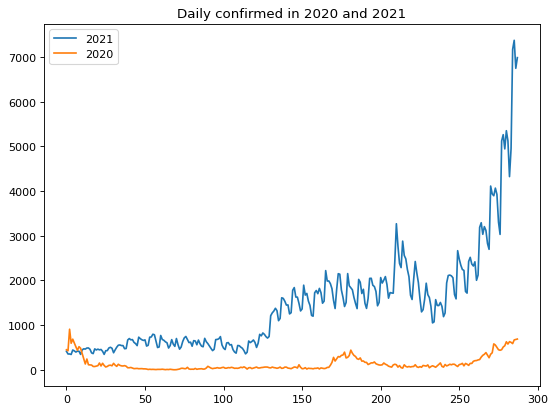

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.title("Daily confirmed in 2020 and 2021")
plt.plot(covid_2021_df["일일확진"],label="2021")
plt.plot(covid_2020_df["일일확진"],label="2020")
plt.legend()
plt.show()

## with Vaccine

In [ ]:
vaccine_percentage_df.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
0,2021.12.15,9505868,11851,8034078,84.5,7820,7815332,82.2,170057.0,1663071.0,17.5
1,2021.12.14,9505868,8483,8008859,84.3,6705,7795782,82.0,139233.0,1344229.0,14.1
2,2021.12.13,9505868,11156,8008859,84.3,10094,7795782,82.0,143908.0,1344229.0,14.1
3,2021.12.12,9505868,304,7994449,84.1,284,7782371,81.9,1826.0,1199359.0,12.6
4,2021.12.11,9505868,4597,7994240,84.1,6048,7782165,81.9,59658.0,1197488.0,12.6


In [ ]:
vaccine_percentage_df = vaccine_percentage_df[5:]#slice ot meet the apt date

In [ ]:
vaccine_percentage_df = vaccine_percentage_df.iloc[::-1]
vaccine_percentage_df = vaccine_percentage_df.reset_index(drop=True)
vaccine_percentage_df.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
0,2021.04.21,1019322,22501,291857,28.6,2358,13543,1.3,0.0,0.0,0.0
1,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6,0.0,0.0,0.0
2,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8,0.0,0.0,0.0
3,2021.04.24,1023346,200,350427,34.2,0,18513,1.8,0.0,0.0,0.0
4,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8,0.0,0.0,0.0


In [ ]:
tmp_covid_2021 = covid_2021_df[covid_2021_df["기준일"]>"20210421"]
len(tmp_covid_2021)

234

In [ ]:
len(vaccine_percentage_df)

234

In [ ]:
vaccine_percentage_df.columns

Index(['접종일', '접종대상자', '당일 1차접종자 수', '1차접종 누계', '1차접종률(%)', '당일 2차접종자 수',
       '2차접종 누계', '2차접종률(%)', '당일 추가접종자 수', '추가접종 누계', '추가접종률(%)'],
      dtype='object')

In [ ]:
tmp_covid_2021.head()

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사,month
54,8497593.0,1806.0,115925.0,458.0,20210421.0,735.0,39911.0,4
55,8537504.0,1808.0,116660.0,459.0,20210422.0,797.0,46025.0,4
56,8583529.0,1811.0,117457.0,460.0,20210423.0,785.0,49393.0,4
57,8632922.0,1812.0,118242.0,461.0,20210424.0,644.0,21868.0,4
58,8654790.0,1813.0,118886.0,462.0,20210425.0,499.0,18187.0,4


## Vaccine Visualization

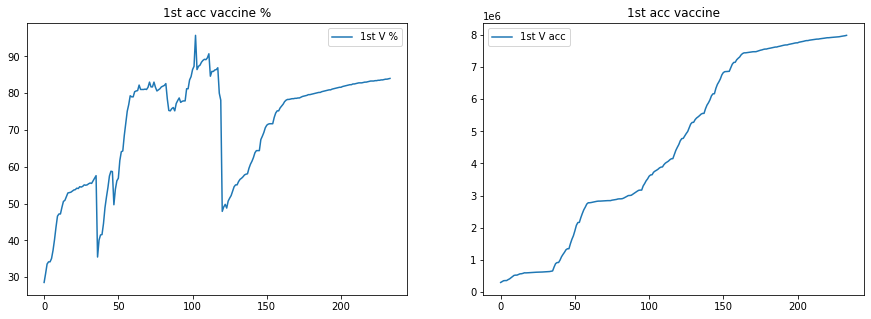

In [ ]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
axis[0].set_title("1st acc vaccine %")
axis[0].plot(vaccine_percentage_df["1차접종률(%)"],label = "1st V %")
#axis[0].plot(hmap["전체누적 1차"],label= "V1")
axis[0].legend()
axis[1].set_title("1st acc vaccine")
axis[1].plot(vaccine_percentage_df["1차접종 누계"],label = "1st V acc")
#axis[1].plot(hmap["전체누적 1차"],label= "V1")
axis[1].legend()

In [ ]:
tmp_covid_2021 = tmp_covid_2021.reset_index(drop=True)

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [ ]:
normalized_acc_1st = NormalizeData(vaccine_percentage_df["1차접종 누계"])
normalized_covid_21 = NormalizeData(tmp_covid_2021["누적확진자"])

In [ ]:
normalized_acc_2nd = NormalizeData(vaccine_percentage_df["2차접종 누계"])

In [ ]:
normalized_daily_confirmed = NormalizeData(tmp_covid_2021["일일확진"])

In [ ]:
vaccine_percentage_df.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
0,2021.04.21,1019322,22501,291857,28.6,2358,13543,1.3,0.0,0.0,0.0
1,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6,0.0,0.0,0.0
2,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8,0.0,0.0,0.0
3,2021.04.24,1023346,200,350427,34.2,0,18513,1.8,0.0,0.0,0.0
4,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8,0.0,0.0,0.0


In [ ]:
tmp_covid_2021.head()

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사,month
0,8497593.0,1806.0,115925.0,458.0,20210421.0,735.0,39911.0,4
1,8537504.0,1808.0,116660.0,459.0,20210422.0,797.0,46025.0,4
2,8583529.0,1811.0,117457.0,460.0,20210423.0,785.0,49393.0,4
3,8632922.0,1812.0,118242.0,461.0,20210424.0,644.0,21868.0,4
4,8654790.0,1813.0,118886.0,462.0,20210425.0,499.0,18187.0,4


In [ ]:
normalized_acc_1st

0      0.000000
1      0.003317
2      0.007003
3      0.007609
4      0.007635
         ...   
229    0.995654
230    0.996567
231    0.997483
232    0.998546
233    1.000000
Name: 1차접종 누계, Length: 234, dtype: float64

In [ ]:
normalized_covid_21

0      0.000000
1      0.001896
2      0.003952
3      0.005977
4      0.007638
         ...   
229    0.932291
230    0.945068
231    0.963570
232    0.982594
233    1.000000
Name: 누적확진자, Length: 234, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


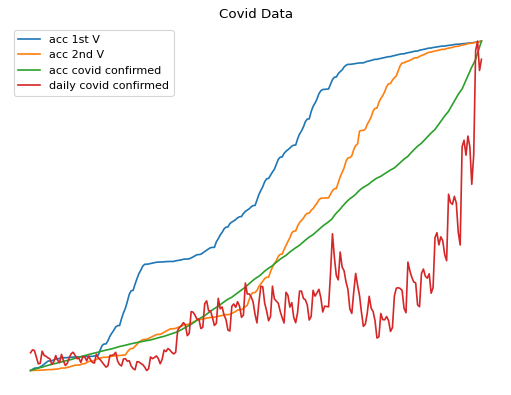

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.title("Covid Data")
plt.plot(normalized_acc_1st,label="acc 1st V")
plt.plot(normalized_acc_2nd,label="acc 2nd V")
plt.plot(normalized_covid_21,label="acc covid confirmed")
plt.plot(normalized_daily_confirmed,label="daily covid confirmed")
ax1 = plt.axes()
y_axis = ax1.axes.get_yaxis()
y_axis.set_visible(False)
plt.axis('off')
plt.legend()
plt.show()

get the apt data

In [ ]:
#reverse vaccine data if neccessary to unify the order of dates
vaccine_df = vaccine_df.iloc[::-1]

In [ ]:
vaccine_df = vaccine_df.reset_index(drop=True)

In [ ]:
vaccine_df.tail()

,일자,전체누적 1차,전체누적 2차,전체누적 3차,AZ 1차 누적,AZ 2차 누적,화이자 누적 1차,화이자 누적 2차,얀센 누적 1차,모더나 누적 1차,모더나 누적 2차,화이자 누적 3차,모더나 누적 3차,얀센 누적 3차,기준일
283,2021-12-06 00:00:00,42767084.0,41445363.0,4255697.0,11132501.0,11049592.0,23417672.0,22442533.0,1502678.0,6714233.0,6450560.0,3249998.0,989368.0,16331.0,20211206
284,2021-12-07 00:00:00,42805464.0,41487896.0,4550578.0,11132501.0,11050438.0,23451801.0,22474680.0,1502920.0,6718242.0,6459858.0,3466942.0,1066928.0,16708.0,20211207
285,2021-12-08 00:00:00,42851927.0,41540090.0,4856586.0,11132501.0,11051354.0,23494134.0,22517201.0,1503249.0,6722043.0,6468286.0,3681240.0,1157996.0,17350.0,20211208
286,2021-12-09 00:00:00,42897791.0,41595614.0,5304622.0,11132502.0,11052241.0,23536476.0,22562986.0,1503589.0,6725224.0,6476798.0,3945515.0,1341276.0,17831.0,20211209
287,2021-12-10 00:00:00,42949689.0,41671113.0,6076863.0,11132511.0,11053501.0,23583989.0,22623551.0,1503981.0,6729208.0,6490080.0,4310906.0,1747491.0,18466.0,20211210


In [ ]:
covid_df[covid_df["기준일"] == 20210226]

,누적검사,누적사망자,누적확진자,고유번호,기준일,일일확진,일일검사
289,6590065.0,1585.0,88894.0,404.0,20210226.0,415.0,37149.0


In [ ]:
visualize_covid = covid_df[:288]

In [ ]:
visualize_vaccine = vaccine_df

In [ ]:
visualize_vaccine.columns

Index(['일자', '전체누적 1차', '전체누적 2차', '전체누적 3차', 'AZ 1차 누적', 'AZ 2차 누적',
       '화이자 누적 1차', '화이자 누적 2차', '얀센 누적 1차', '모더나 누적 1차', '모더나 누적 2차',
       '화이자 누적 3차', '모더나 누적 3차', '얀센 누적 3차', '기준일', 'month'],
      dtype='object')

add 월 column

In [ ]:
visualize_covid["month"] = 0
visualize_vaccine["month"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
visualize_covid = visualize_covid.reset_index(drop=True)#reset index

In [ ]:
visualize_covid["기준일"]

0      20211210.0
1      20211209.0
2      20211208.0
3      20211207.0
4      20211206.0
          ...    
283    20210302.0
284    20210301.0
285    20210228.0
286    20210227.0
287    20210226.0
Name: 기준일, Length: 288, dtype: float64

In [ ]:
len(visualize_covid)

288

In [ ]:
len(visualize_vaccine)

288

In [ ]:
for i in range(len(visualize_covid)):
  m = str(visualize_covid["기준일"][i])
  visualize_covid["month"][i] = m[4:6]
  m2 = str(visualize_vaccine["기준일"][i])
  visualize_vaccine["month"][i] = m2[4:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
visualize_vaccine = visualize_vaccine.astype({'전체누적 1차':float, '전체누적 2차':float, '전체누적 3차':float, 'AZ 1차 누적':float, 'AZ 2차 누적':float,
       '화이자 누적 1차':float, '화이자 누적 2차':float, '얀센 누적 1차':float, '모더나 누적 1차':float, '모더나 누적 2차':float,
       '화이자 누적 3차':float, '모더나 누적 3차':float, '얀센 누적 3차':float, "기준일":str})

standardization

In [ ]:
'''
from sklearn import preprocessing
visualize_covid["누적사망자"] = preprocessing.scale(visualize_covid["누적사망자"])
visualize_covid["누적확진자"] = preprocessing.scale(visualize_covid["누적확진자"])
visualize_vaccine["전체누적 1차"] = preprocessing.scale(visualize_vaccine["전체누적 1차"])
visualize_vaccine["전체누적 2차"] = preprocessing.scale(visualize_vaccine["전체누적 2차"])
visualize_vaccine["전체누적 3차"] = preprocessing.scale(visualize_vaccine["전체누적 3차"])'''
#standardization for covid
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
vc = visualize_covid[["누적사망자","누적확진자"]]
scale_visualize_covid = scale.fit_transform(vc) 

In [ ]:
#standardization for vaccine
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
vv = visualize_vaccine[["전체누적 1차","전체누적 2차","전체누적 3차"]]
scale_visualize_vaccine = scale.fit_transform(vv)

normalization

In [ ]:
from sklearn import preprocessing
normalize_visualize_covid = preprocessing.normalize(scale_visualize_covid)
normalize_visualize_vaccine = preprocessing.normalize(scale_visualize_vaccine)

In [ ]:
visualize_vaccine

,일자,전체누적 1차,전체누적 2차,전체누적 3차,AZ 1차 누적,AZ 2차 누적,화이자 누적 1차,화이자 누적 2차,얀센 누적 1차,모더나 누적 1차,모더나 누적 2차,화이자 누적 3차,모더나 누적 3차,얀센 누적 3차,기준일,month
287,2021-12-10 00:00:00,42949689.0,41671113.0,6076863.0,11132511.0,11053501.0,23583989.0,22623551.0,1503981.0,6729208.0,6490080.0,4310906.0,1747491.0,18466.0,20211210,12
286,2021-12-09 00:00:00,42897791.0,41595614.0,5304622.0,11132502.0,11052241.0,23536476.0,22562986.0,1503589.0,6725224.0,6476798.0,3945515.0,1341276.0,17831.0,20211209,12
285,2021-12-08 00:00:00,42851927.0,41540090.0,4856586.0,11132501.0,11051354.0,23494134.0,22517201.0,1503249.0,6722043.0,6468286.0,3681240.0,1157996.0,17350.0,20211208,12
284,2021-12-07 00:00:00,42805464.0,41487896.0,4550578.0,11132501.0,11050438.0,23451801.0,22474680.0,1502920.0,6718242.0,6459858.0,3466942.0,1066928.0,16708.0,20211207,12
283,2021-12-06 00:00:00,42767084.0,41445363.0,4255697.0,11132501.0,11049592.0,23417672.0,22442533.0,1502678.0,6714233.0,6450560.0,3249998.0,989368.0,16331.0,20211206,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-03-02 00:00:00,101811.0,6956.0,0.0,91467.0,1585.0,4657.0,1638.0,30.0,5657.0,3703.0,0.0,0.0,0.0,20210302,3
3,2021-03-01 00:00:00,35114.0,6812.0,0.0,25610.0,1553.0,3912.0,1594.0,28.0,5564.0,3637.0,0.0,0.0,0.0,20210301,3
2,2021-02-28 00:00:00,33372.0,6691.0,0.0,24360.0,1505.0,3525.0,1558.0,25.0,5462.0,3603.0,0.0,0.0,0.0,20210228,2
1,2021-02-27 00:00:00,32434.0,6631.0,0.0,23775.0,1504.0,3192.0,1527.0,25.0,5442.0,3575.0,0.0,0.0,0.0,20210227,2


groupby

In [ ]:
normalize_visualize_covid = pd.DataFrame(normalize_visualize_covid)
normalize_visualize_vaccine = pd.DataFrame(normalize_visualize_vaccine)

In [ ]:
normalize_visualize_covid.set_index(visualize_covid["month"], inplace=True)
normalize_visualize_vaccine.set_index(visualize_vaccine["month"], inplace=True)

In [ ]:
normalize_visualize_covid.head()

,0,1
month,,
12,0.805577,0.592492
12,0.804305,0.594216
12,0.802978,0.596009
12,0.800336,0.599552
12,0.794789,0.606886


In [ ]:
normalize_visualize_covid.columns = ["누적사망자","누적확진자"]

In [ ]:
normalize_visualize_vaccine.head()

,0,1,2
month,,,
12,0.218292,0.286524,0.932873
12,0.246266,0.323105,0.913760
12,0.265565,0.348434,0.898926
12,0.280243,0.367757,0.886690
12,0.295895,0.388361,0.872709


In [ ]:
normalize_visualize_vaccine.columns = ["전체누적 1차","전체누적 2차","전체누적 3차"]

In [ ]:
visualize_covid_month = normalize_visualize_covid.groupby(normalize_visualize_covid.index)["누적사망자","누적확진자"].agg("mean")
visualize_vaccine_month = normalize_visualize_vaccine.groupby(normalize_visualize_vaccine.index)["전체누적 1차","전체누적 2차","전체누적 3차"].agg("mean")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
visualize_covid_month

,누적사망자,누적확진자
month,,
2,-0.715742,-0.698351
3,-0.688966,-0.724583
4,-0.662396,-0.749131
5,-0.628572,-0.777361
6,-0.595616,-0.803261
7,-0.682651,-0.723832
8,-0.598295,0.293463
9,0.401557,0.914050
10,0.559708,0.825576


In [ ]:
visualize_vaccine_month

,전체누적 1차,전체누적 2차,전체누적 3차
month,,,
2,-0.792239,-0.576387,-0.200339
3,-0.784022,-0.586272,-0.203873
4,-0.767517,-0.604798,-0.211775
5,-0.747900,-0.619904,-0.236541
6,-0.518880,-0.759981,-0.362770
7,-0.351804,-0.777099,-0.510309
8,0.452619,-0.423487,-0.621883
9,0.836681,0.442765,-0.307756
10,0.696044,0.692902,-0.164322


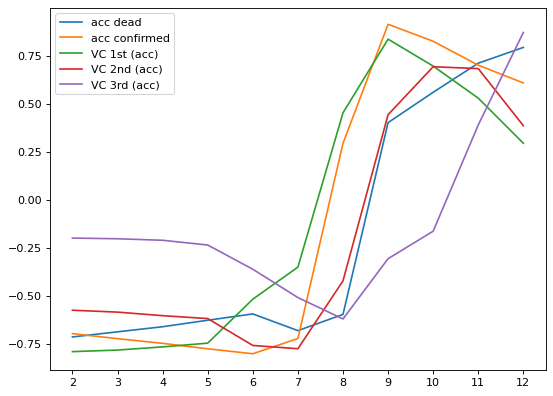

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.xticks(visualize_covid_month.index)
plt.plot(visualize_covid_month.index, visualize_covid_month["누적사망자"],label = "acc dead")
plt.plot(visualize_covid_month.index, visualize_covid_month["누적확진자"],label="acc confirmed")
plt.plot(visualize_vaccine_month.index, visualize_vaccine_month["전체누적 1차"],label = "VC 1st (acc)")
plt.plot(visualize_vaccine_month.index, visualize_vaccine_month["전체누적 2차"],label = "VC 2nd (acc)")
plt.plot(visualize_vaccine_month.index, visualize_vaccine_month["전체누적 3차"],label = "VC 3rd (acc)")
plt.legend()
plt.show()

In [ ]:
hmap = pd.concat([visualize_covid_month, visualize_vaccine_month], axis=1)

In [ ]:
hmap

,누적사망자,누적확진자,전체누적 1차,전체누적 2차,전체누적 3차
month,,,,,
2,-0.715742,-0.698351,-0.792239,-0.576387,-0.200339
3,-0.688966,-0.724583,-0.784022,-0.586272,-0.203873
4,-0.662396,-0.749131,-0.767517,-0.604798,-0.211775
5,-0.628572,-0.777361,-0.747900,-0.619904,-0.236541
6,-0.595616,-0.803261,-0.518880,-0.759981,-0.362770
7,-0.682651,-0.723832,-0.351804,-0.777099,-0.510309
8,-0.598295,0.293463,0.452619,-0.423487,-0.621883
9,0.401557,0.914050,0.836681,0.442765,-0.307756
10,0.559708,0.825576,0.696044,0.692902,-0.164322


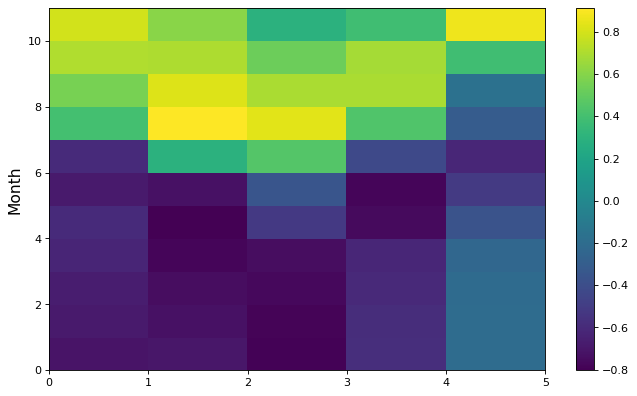

	누적사망자   누적확진자   전체누적 1차   전체누적 2차   전체누적 3차   

In [ ]:
figure(figsize=(10, 6), dpi=80)
plt.pcolor(hmap)
plt.colorbar()
plt.xticks = []
plt.ylabel('Month', fontsize=14)
plt.show()

print("\t",end = "")
for col in hmap.columns:
  print(col, end = "   ")

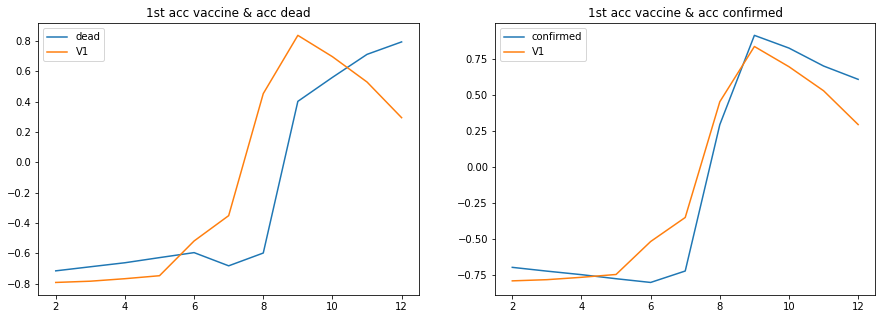

In [ ]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
axis[0].set_title("1st acc vaccine & acc dead")
axis[0].plot(hmap["누적사망자"],label = "dead")
axis[0].plot(hmap["전체누적 1차"],label= "V1")
axis[0].legend()
axis[1].set_title("1st acc vaccine & acc confirmed")
axis[1].plot(hmap["누적확진자"],label = "confirmed")
axis[1].plot(hmap["전체누적 1차"],label= "V1")
axis[1].legend()